In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Markdown, display
from openbb import obb
from sklearn.decomposition import PCA

In [2]:
obb.user.preferences.output_type = "dataframe"

In [3]:
symbols = ["NEM", "RGLD", "SSRM", "CDE", "LLY", "UNH", "JNJ", "MRK"]


In [7]:
data = obb.equity.price.historical(
    symbol=symbols,
    start_date="2020-01-01",
    end_date="2022-12-31",
    provider="cboe",
).pivot(columns="symbol", values="close")

In [8]:
returns = data.pct_change().dropna()


In [16]:
returns

symbol,CDE,JNJ,LLY,MRK,NEM,RGLD,SSRM,UNH
date,,,,,,,,
2020-01-03,-0.014085,-0.011578,-0.003328,-0.008583,-0.009024,-0.008174,-0.023722,-0.010120
2020-01-06,-0.100000,-0.001248,0.003719,0.004274,0.010040,-0.010988,-0.008099,0.006942
2020-01-07,-0.005772,0.006107,0.001890,-0.026626,-0.000693,0.011531,0.015787,-0.006037
2020-01-08,-0.087083,-0.000138,0.009056,-0.006726,-0.026602,-0.071393,-0.023580,0.021084
2020-01-09,0.017488,0.002966,0.016528,0.008804,-0.009981,0.005287,-0.027442,-0.005678
...,...,...,...,...,...,...,...,...
2022-12-23,-0.011527,0.002542,0.007090,0.005574,0.007368,0.009393,0.008855,0.008006
2022-12-27,0.075802,-0.000282,-0.008209,0.002324,0.018809,0.013914,0.024451,0.001280
2022-12-28,-0.059621,-0.004340,0.000932,-0.009276,-0.028308,-0.025435,-0.039168,-0.006654


In [9]:
pca = PCA(n_components=3)
pca.fit(returns)

PCA(n_components=3)

In [12]:
pct = pca.explained_variance_ratio_
pca_components = pca.components_

In [19]:
pct

array([0.63901831, 0.13367809, 0.10155896])

In [13]:
display(pca_components)

array([[ 0.78393006,  0.06143089,  0.06160311,  0.06816511,  0.29177613,
         0.30859274,  0.42711885,  0.10220165],
       [ 0.03068298,  0.34085106,  0.60697241,  0.38892377, -0.09258777,
        -0.12489908, -0.22950765,  0.53512228],
       [ 0.61810934, -0.10895378, -0.13234297, -0.07217021, -0.39547266,
        -0.41749713, -0.48366699, -0.1367863 ]])

In [14]:
cum_pct = np.cumsum(pct)
x = np.arange(1, len(pct) + 1, 1)

In [18]:
cum_pct

array([0.63901831, 0.7726964 , 0.87425536])

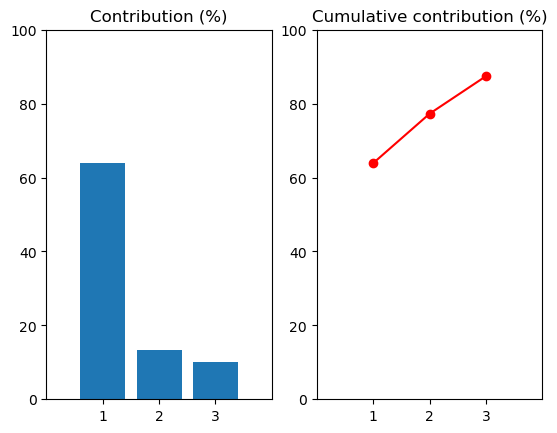

In [15]:
plt.subplot(1, 2, 1)
plt.bar(x, pct * 100, align="center")
plt.title("Contribution (%)")
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.plot(x, cum_pct * 100, "ro-")
plt.title("Cumulative contribution (%)")
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

plt.show()